<p align="center">
    <img src="https://github.com/alek-07/CC-AI/blob/main/escudo.png?raw=true" width="420" height="440" />

</p>

## 1. Actividad: Campaña de medidas vehiculares (Vehículo a infraestructura en autovía Garcia Roel)

**Introducción:**

La reciente campaña de medidas en el entorno vehicular se llevó a cabo mediante la emulación de un enlace entre un vehículo y la infraestructura (RSU), utilizando la carretera García Roel ubicada a un lado de nuestra universidad. Esta iniciativa tiene como objetivo principal emular una infraestructura inteligente que podría representar elementos como parquímetros, cruces peatonales, semáforos, entre otros.

Durante el estudio, el vehículo transitó por la carretera desde un extremo hasta el otro, estableciendo y manteniendo un enlace continuo con la infraestructura. Es importante señalar que el sentido de dirección en el que se desplaza el vehículo con respecto a la infraestructura se deja sin determinar por el momento, lo cual se convierte en un ejercicio valioso para el análisis y la comprensión de los resultados obtenidos.

Esta iniciativa busca proporcionar datos valiosos sobre la interacción entre vehículos y la infraestructura inteligente, contribuyendo así al avance de tecnologías que promueven la seguridad y eficiencia en el entorno vial. Algunas imágenes de los materiales y elementos utilizados en esta campaña se pueden ver a continuación:

<p align="center">
    <img src="https://raw.githubusercontent.com/alek-07/CC-AI/main/tx1.jpg" width="540" height="680" />

</p>

<p align="center">
    <img src="https://raw.githubusercontent.com/alek-07/CC-AI/main/tx2.jpg" width="540" height="680" />

</p>

<p align="center">
    <img src="https://raw.githubusercontent.com/alek-07/CC-AI/main/rx1.jpg" width="540" height="680" />

</p>

<p align="center">
    <img src="https://raw.githubusercontent.com/alek-07/CC-AI/main/rx2.jpg" width="540" height="680" />

</p>



La frecuencia de transmisión seleccionada para este experimento se sitúa en los 28 GHz, en el contexto de las bandas milimétricas New Radio (NR) de las recomendaciones 3GPP. Este rango de frecuencia es conocido por su capacidad para proporcionar tasas de transferencia de datos significativamente altas, lo que resulta fundamental para aplicaciones que demandan un ancho de banda amplio.

El transmisor utilizado se encuentra a una altura aproximada de 1.5 metros sobre el nivel de la acera. Esta ubicación específica permite caracterizar la locación de posibles infraestructuras a los laterales de la vía.

Para llevar a cabo la transmisión, se implementó una antena omnidireccional polarizada verticalmente, con una ganancia de 3 dBi. Esta antena es esencial para garantizar la cobertura en todas las direcciones, lo que resulta crucial en entornos dinámicos y móviles. En el proceso de transmisión, la antena recibe un tono sinusoidal proveniente de un generador de señales. Este generador de señales, a su vez, proporciona la portadora sinusoidal que será transmitida. Para ajustar la frecuencia a los 28 GHz, se emplea un Up-Converter que duplica la frecuencia de la señal de salida del generador (14GHz), ya que el máximo posible está limitado a los 20GHz, con una ganancia específica de 24 dB. Los equipos específicos utilizados ya han sido cubiertos en previas presentaciones y el esquema de conexión empleado puede verse en la siguiente figura:


![tx_schm](https://raw.githubusercontent.com/alek-07/CC-AI/main/schm_tx.png)



El sistema de recepción, en contraste con su homólogo de transmisión, está equipado con una antena omnidireccional, sin embargo, a diferencia de la antena de transmisión, esta antena receptora incorpora un sistema de amplificación de bajo ruido, comúnmente conocido como LNA (Low Noise Amplifier). La presencia de este LNA resulta crucial para mitigar la degradación de la señal durante la etapa de recepción, asegurando así una señal más limpia y confiable. La ganancia total del sistema de recepción, considerando la antena y el LNA, se estima en 30 dBi. Esta ganancia adicional contribuye significativamente a mejorar la sensibilidad del sistema, permitiendo la captura de señales débiles y mejorando la relación señal-ruido.

La salida de la antena, ya amplificada por el LNA, es dirigida hacia un Analizador Espectral. Este dispositivo es responsable de analizar la distribución de las frecuencias presentes en la señal recibida. La capacidad del Analizador Espectral para descomponer la señal en sus componentes frecuenciales permite un análisis detallado y preciso de la información transmitida. Es importante destacar que los datos obtenidos durante este proceso de análisis son registrados a una frecuencia aproximada de 50 milisegundos por barrido. Este intervalo de tiempo entre barridos garantiza una captura continua y detallada de la información, proporcionando así una visión dinámica de las variaciones en las características de la señal a lo largo del tiempo. Un esquema general del sistema empleado en la recepción se pude ver en la siguiente figura:

![tx_schm](https://raw.githubusercontent.com/alek-07/CC-AI/main/schm_rx.png)


Otros datos especificos del experimento son:
- Potencia total de transmisión -> 57 dBm
- Velocidad media (considerar constante) -> 8.33 m/s



## 1.1 Potencia Instatánea maxima recibida

Primero cargaremos algunas librerías que necesitaremos a lo largo de la actividad y crearemos un DataFrame con los datos de medidas generados por el Analizador Espectral. Se muestra un encabezado del archivo donde en los campos de fila se encuentran los diferentes barridos de frecuencia en cada instante de tiempo, y los campos columna incluye la columna d tiempo y las frecuencias discretas medidas por el analizador.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import norm, probplot
from sklearn.metrics import mean_squared_error
from sklearn.neural_network import MLPRegressor
from pykrige.ok import OrdinaryKriging
 

csv_file = "https://raw.githubusercontent.com/alek-07/CC-AI/main/data4.csv" #Sustituir el numero de data correspondiente
df = pd.read_csv(csv_file)
df['DateTime'] = pd.to_datetime(df['DateTime'], format='%b.%d.%Y %I:%M:%S.%f %p')
df['DateTime'] = (df['DateTime'] - df['DateTime'].iloc[0]).dt.total_seconds()
df.head()


,DateTime,27999980000,27999980025,27999980050,27999980075,27999980100,27999980125,27999980150,27999980175,27999980200,...,27999989775,27999989800,27999989825,27999989850,27999989875,27999989900,27999989925,27999989950,27999989975,27999990000
0,0.000,-112.197,-112.231,-110.796,-110.229,-110.827,-112.370,-113.395,-113.227,-112.704,...,-118.338,-110.632,-106.009,-104.467,-106.891,-112.929,-117.811,-107.740,-106.285,-108.678
1,0.174,-131.289,-111.696,-110.054,-110.991,-111.630,-111.910,-111.809,-110.681,-108.649,...,-113.191,-123.843,-122.479,-118.109,-116.224,-116.639,-114.034,-111.293,-110.098,-110.381
2,0.225,-113.910,-110.063,-109.220,-112.964,-121.107,-114.561,-107.474,-106.724,-106.479,...,-105.731,-106.709,-107.660,-107.977,-107.897,-108.187,-109.785,-113.660,-117.059,-115.238
3,0.276,-108.805,-106.061,-103.501,-102.566,-103.624,-107.154,-110.732,-111.678,-109.949,...,-136.499,-122.310,-115.365,-111.515,-108.640,-107.302,-107.997,-110.035,-108.951,-107.263
4,0.327,-107.627,-110.146,-109.730,-107.844,-106.959,-106.809,-107.400,-107.953,-107.853,...,-109.151,-108.303,-107.376,-106.085,-105.057,-105.740,-109.542,-121.101,-115.956,-109.882


Ahora graficaremos el espectrograma en un instante de tiempo fijado. Para esto fijaremos una de las filas de los datos obtenidos y graficaremos a lo largo de la frecuencia registrada.

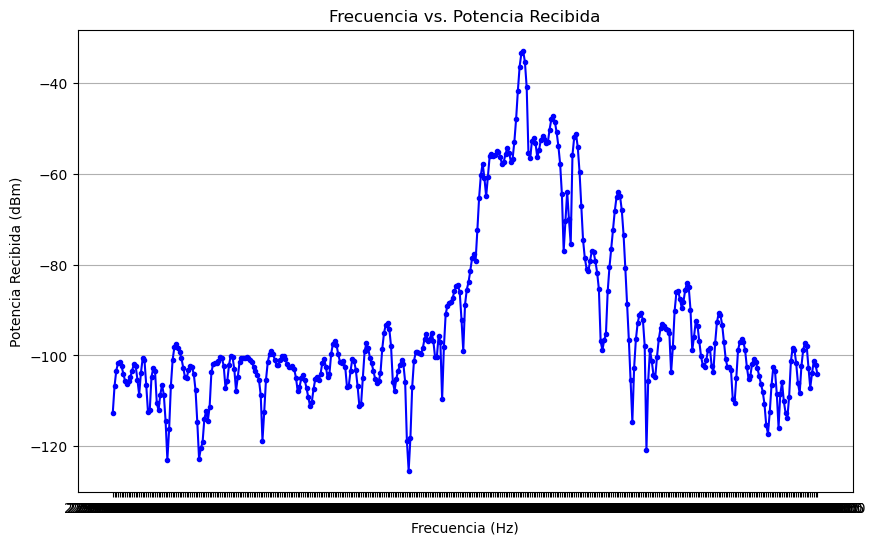

In [30]:
select_time = df.sample().index[0]
pow_value = df.iloc[select_time,1:].values  
frequency_values = df.columns[1:].values

# Plot frequency vs. received power
plt.figure(figsize=(10, 6))
plt.plot(frequency_values, pow_value, color='blue', linestyle='-', marker='o', markersize=3)
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Potencia Recibida (dBm)')
plt.title('Frecuencia vs. Potencia Recibida')
plt.grid(True, axis='y')
plt.show()

### Evalúe o responda las siguientes preguntas:

#### 1. Que representa la figura generada?
#### 2. Cual es el valor estimado de la portadora (Frecuencia de transmisión)?
#### 3. Cual es el nivel de ruido de este instrumento? 
#### 4. Cual es el valor de SNR en esta muestra?

## 1.2 Evolución en el tiempo del espectro de potencias recibidas

A continuación, exploraremos la variación a lo largo del tiempo del espectro de potencias recibidas. Para lograr esto, emplearemos un gráfico de superficie como representación 2D, donde el eje x representa la frecuencia, el eje y representa el tiempo (expresado de manera relativa) y el plano de superficie es la potencia recibida. Los resultados nos brindarán una perspectiva desde el punto de vista del receptor, mostrándonos cómo se comporta la señal recibida a medida que el receptor se desplaza desde el inicio hasta el final de la trayectoria.

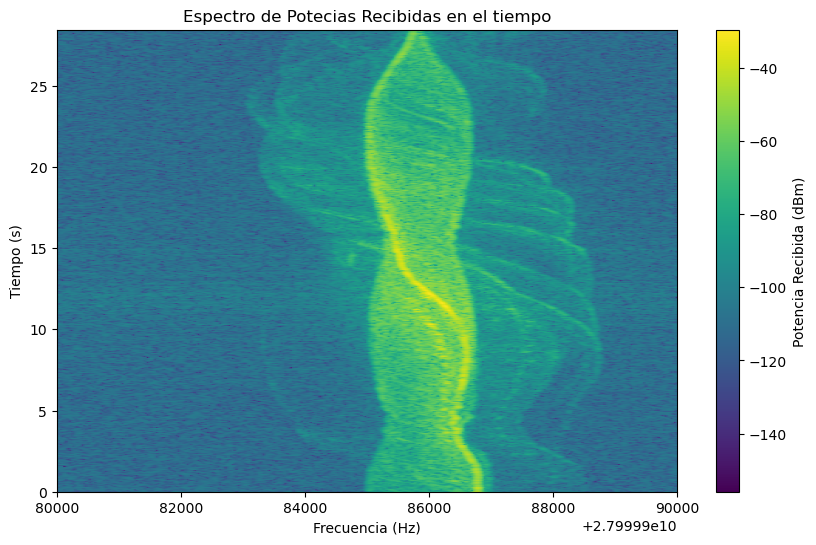

In [31]:
time_axis = df['DateTime'].values
frequency_axis = df.columns[1:].values  
frequency_axis = np.array(frequency_axis, dtype=float)
power_values = df.iloc[:, 1:].values  

# Create a 2D plot
plt.figure(figsize=(10, 6))
plt.imshow(power_values, extent=[frequency_axis.min(), frequency_axis.max(), time_axis.min(), time_axis.max()],
           origin='lower', cmap='viridis', aspect='auto')

# labels
plt.ylabel('Tiempo (s)')
plt.xlabel('Frecuencia (Hz)')
plt.title('Espectro de Potecias Recibidas en el tiempo')
plt.colorbar(label='Potencia Recibida (dBm)')
plt.show()


### Evalúe o responda las siguientes preguntas:

#### 1. Que representa los movimientos en frecuencia de la portadora en esta figura?
#### 2. En que dirección relativa al transmisor se esta moviendo el vehiculo?
#### 3. Determine el Doppler Shif máximo? 

## 1.3 Estimar la potencia máxima instantánea recibida

En este momento, calcularemos la potencia instantánea máxima recibida por el receptor en función de la distancia recorrida. Utilizaremos la suposición de una velocidad constante de 8.33 m/s y, con la asistencia del tiempo relativo, podremos determinar la distancia relativa de desplazamiento del vehículo.




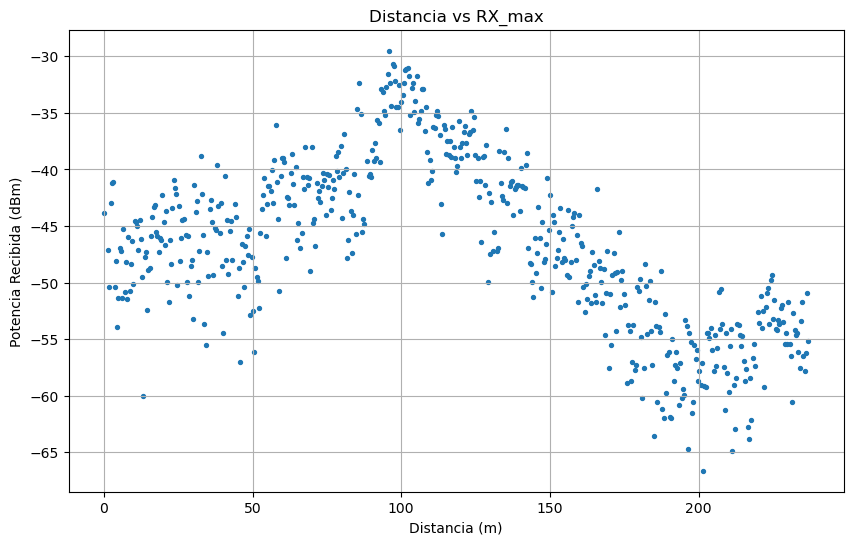

In [32]:
RxPw=np.max(power_values, axis=1)
distance = time_axis*8.33

# Plot distance vs RSSI_dBm 
plt.figure(figsize=(10, 6))
plt.scatter(distance, RxPw, s=8)
plt.xlabel('Distancia (m)')
plt.ylabel('Potencia Recibida (dBm)')
plt.title('Distancia vs RX_max')
plt.grid(True)
plt.show()


### Evalúe o responda las siguientes preguntas:

#### 1. Cual es la potencia máxima recibida durante toda la trayectoria del vehículo?
#### 2. Es esta gráfica consistente con el escenario descrito (es lo esperado dado la trayectoria del vehículo)?
 

## 1.4 Path Loss

Ya definido el Path Loss como un fenómeno centrado en el transmisor, donde la potencia disminuye a medida que se propagan las ondas electromagnéticas, es necesario tener la distancia relativa al transmisor para estimar el path loss.

Dado que el vehículo se desplaza de un extremo al otro de la vía y el transmisor está en el centro, una suposición lógica es que el pico de máxima potencia recibida ocurre en el punto donde el receptor está más cercano al transmisor, siendo perpendicular a él en la trayectoria del receptor. Considerando estas premisas, podemos determinar la distancia radial al transmisor al buscar el punto de máxima potencia recibida. Utilizando ciertas manipulaciones algebraicas, podemos calcular la distancia radial del receptor para cada muestra y representar gráficamente el path loss.


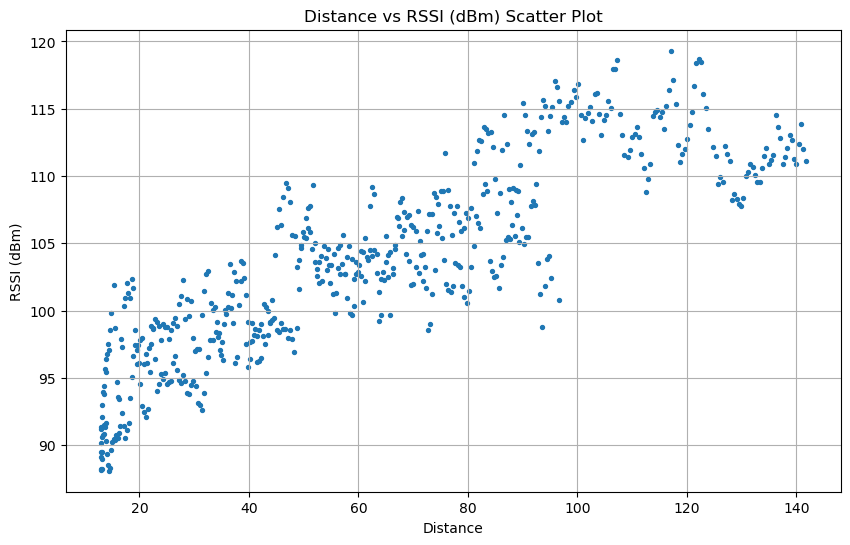

In [33]:
#find the max position
max_position = np.argmax(RxPw)
rel_pos=distance-distance[max_position]
rel_pos = np.column_stack((rel_pos, np.full_like(rel_pos, 13)))
tx_distance = np.linalg.norm(rel_pos, axis=1)

path_loss=57-RxPw


# Define a moving average
def simple_moving_average(data, window_size):
    moving_averages = []

    for i in range(len(data)):
        start_index = max(0, i - window_size + 1)
        window = data[start_index : i + 1]
        average = sum(window) / len(window)
        moving_averages.append(average)

    return np.array(moving_averages)

window_size=3;
path_loss_avg=simple_moving_average(path_loss, window_size)


path_loss_slice=path_loss_avg[max_position:]
tx_distance_slice=tx_distance[max_position:]


# Plot distance vs path loss scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tx_distance,path_loss_avg, s=8)
plt.xlabel('Distance')
plt.ylabel('RSSI (dBm)')
plt.title('Distance vs RSSI (dBm) Scatter Plot')
plt.grid(True)
plt.show()



### Evalúe o responda las siguientes preguntas:

#### 1. Determine el Path Loss vs distancia radial. Explique como se obtuvo.
#### 2. Por que existe una moving average en esta gráfica, para que se emplea y que representa la ventana de 3 muestras.

## 1.5 Modelo Close-In Free space Path Loss

Uno de los modelos de pérdida de trayecto más citados es el modelo Close-In Free Space Path Loss, desarrollado por el grupo de Comunicaciones Inalámbricas de la Universidad de Nueva York (NYU). Los parámetros distintivos de este modelo pueden derivarse de datos experimentales mediante un ajuste de curva, permitiendo calcular el exponente de pérdida y la desviación estándar. Note que se a tomado una sección del trayecto (path_loss_slice) para garantizar que los valores cercanos pertenecen a una misma región espacial. Si se desea usar la otra sección del trayecto debemos cambiar el path_loss_slice utilizado.


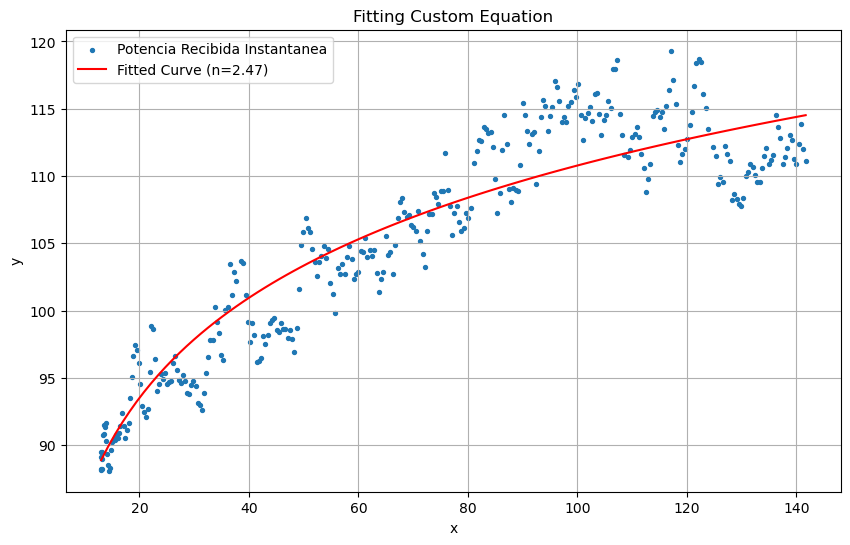

In [34]:
# Define the CI model
def ci_equation(x, n):
    return 61.38 + 10 * n * np.log10(x)


# Fit the model
params, covariance = curve_fit(ci_equation, tx_distance_slice, path_loss_slice)
estimated_n=params[0]

# Generate values for the fitted curve
x_fit = np.linspace(min(tx_distance_slice), max(tx_distance_slice), 100)
y_fit = ci_equation(x_fit, estimated_n)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(tx_distance_slice, path_loss_slice, label='Potencia Recibida Instantanea', s=8)
plt.plot(x_fit, y_fit, color='red', label=f'Fitted Curve (n={estimated_n:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Fitting Custom Equation')
plt.legend()
plt.grid(True)
plt.show()

### Evalúe o responda las siguientes preguntas:

#### 1. Cual es el valor del exponente de pérdidas para ambas secciones del trayecto.
#### 2. Son consistentes en ambos casos? Justifique
#### 3. Tiene relación el valor obtenido con el ambiente vehicular que representa (Urbano)? 
#### 4. Explique el siguiente modelo de Path Loss (a depender del grupo [G1. single-frequency FI model, G2. 3GPP Path Loss Model, G3. multi-frequency alpha-betagamma (ABG) model, G4. METIS Path Loss]). Como se compone, para que ambientes y frequencias está diseñado. Cuales parámetros emplea?

## 1.6 Shadow Fading 

Las discrepancias entre el modelo y los valores de potencia describen las variaciones en la señal a lo largo del Path Loss, y por ende, se incorporan en el modelo como el shadow fading. Esta variable suele exhibir un comportamiento gaussiano con una media de 0 y una desviación estándar que es característica del entorno.


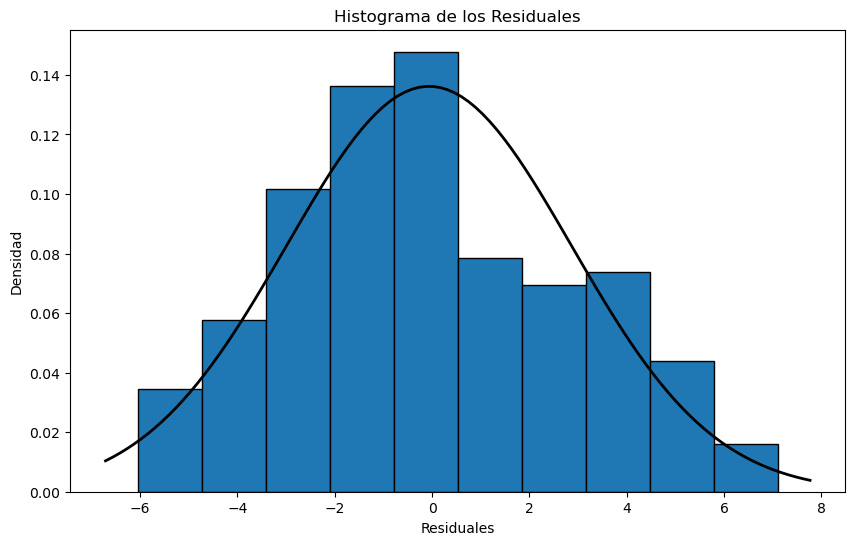

2.9302486225948376

In [35]:
# Calculate residuals
residuals = path_loss_slice - ci_equation(tx_distance_slice, estimated_n)

# Calculate the variance of residuals
residual_std = np.std(residuals)

# Plot histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=10, density=True, edgecolor='black')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, np.mean(residuals), np.std(residuals))
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Residuales')
plt.ylabel('Densidad')
plt.title('Histograma de los Residuales')
plt.show()

residual_std

### Evalúe o responda las siguientes preguntas:

#### 1. Determine los residuales del modelo y estime sus parámetros estadísticos. Ambos tramos del trayecto
#### 2. Son consistentes con lo esperado? Justifique
#### 3. Cual es el nombre utilizado para estos residuales de cambio "lento" en el espacio?

## 1.7 Correlación espacial del Shadow Fading

La potencia recibida y, por extensión, el shadow fading son variables espaciales que, sujetas a la realidad, exhiben una correlación espacial intrínseca.
Esta característica representa una herramienta valiosa en métodos de inferencia, ya que permite incorporar información en la inferencia de valores espaciales desconocidos.
Podemos apreciar esta propiedad al tratar el shadow fading como una serie espacial (que de hecho lo es) y al estimar la función de autocorrelación (para lags positivos). Según la literatura, un umbral de 1/e se utiliza comúnmente como indicador para determinar la distancia de correlación espacial entre las muestras.
En términos prácticos, esto significa que las muestras dentro de un área (o longitud lineal en este contexto) con dimensiones espaciales desde cero hasta donde la autocorrelación cruza el umbral se consideran altamente correlacionadas espacialmente, y pueden emplearse para enriquecer la inferencia.


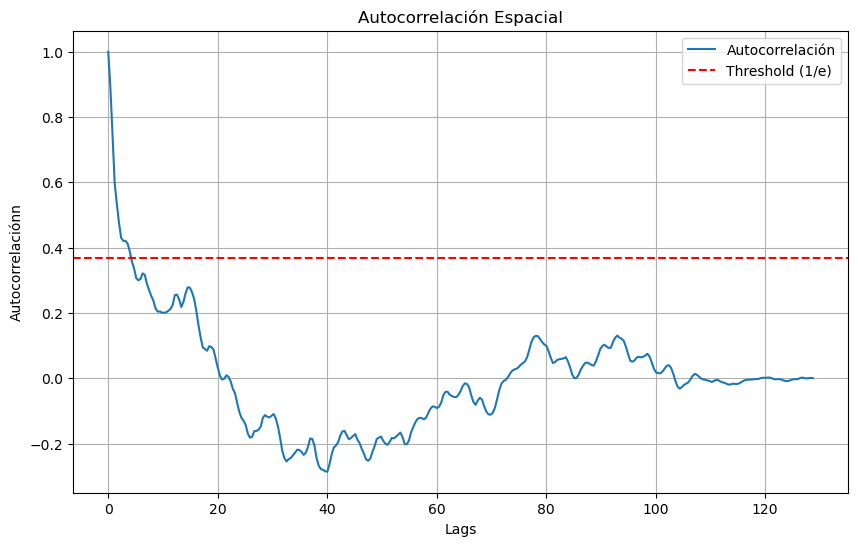

In [36]:

spatial_series = residuals

differences = np.diff(tx_distance_slice)

# Estimate the mean lag (difference)
mean_lag = np.mean(differences)

# Calculate autocorrelation using numpy's correlate function
autocorrelation = np.correlate(spatial_series, spatial_series, mode='full')

# Normalize the autocorrelation values
autocorrelation /= np.max(autocorrelation)

# Plot the autocorrelation starting from lag 0 as a line plot
lags = np.arange(0, len(spatial_series))
plt.figure(figsize=(10, 6))
plt.plot(lags*mean_lag, autocorrelation[len(spatial_series)-1:], label='Autocorrelación')

# Plot a line threshold at 1/e
threshold = 1/np.e
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold (1/e)')

plt.title('Autocorrelación Espacial')
plt.xlabel('Lags')
plt.ylabel('Autocorrelaciónn')
plt.legend()
plt.grid(True)
plt.show()



### Evalúe o responda las siguientes preguntas:

#### 1. Determine la correlación espacial en ambos tramos del trayecto y grafíquelos.
#### 2. Utilizando el umbral de referencia, cual es la distancia de correlacion espacial del Shadow Fading?

## 1.8 Inferencia de Potencia Recibida

En esta etapa del análisis, nos embarcaremos en la estimación y predicción de datos de Path Loss en áreas donde carecemos (eliminaremos) de información espacial. Para abordar este desafío, utilizaremos varios métodos. En primer lugar, emplearemos la interpolación lineal simple, confiando en que este método funcionará eficazmente cuando la cantidad de datos espaciales faltantes sea relativamente pequeña en comparación con la información disponible en su entorno cercano. En segundo lugar, implementaremos un método que no dependerá de tener información alrededor de los valores a estimar, utilizaremos el mismo modelo de Path Loss CI, complementado con una variable aleatoria derivada del análisis previo realizado sobre el shadow fading. Nuestro tercer enfoque será el kriging, un método de interpolación espacial que, aunque no pertenece a los métodos clásicos de aprendizaje automático (ML), puede considerarse como un modelo supervisado de regresión. Al entrenar con toda la información espacial, esperamos que este método sea más resistente a la pérdida de un gran número de muestras. Finalmente, incorporaremos un método de ML con perceptrones multicapa (MLP) para entrenar con todos los datos de las medidas y predecir los valores faltantes de manera integral.

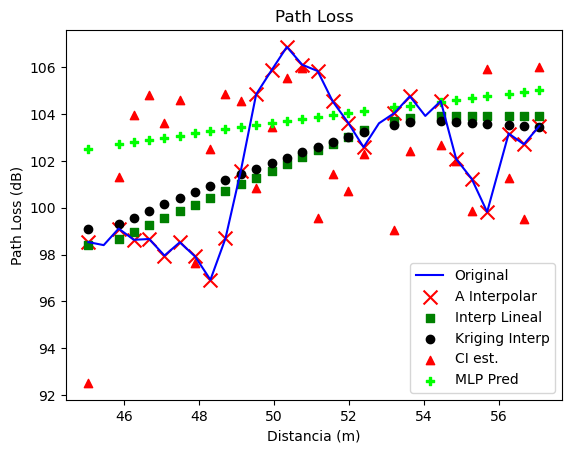

MSE between Interpolated and Real values: 5.3730
MSE between kriging and Real values: 5.3046
MSE between CI+random and Real values: 15.9293
MSE between MLP and Real values: 10.592569140757794


In [37]:
# section to estimate
start_section=100
end_section=130

#
percentage_to_remove=0.9      # give a percentage of samples to be lost and estimate
samples_to_remove = int(percentage_to_remove* (end_section-start_section))

spatial_series = path_loss_slice[start_section:end_section]
distance_ser=tx_distance_slice[start_section:end_section]
sf_int=residuals


# Randomly select points to be interpolated
selected_indices = np.random.choice(len(spatial_series), size=samples_to_remove, replace=False)
selected_mask = np.zeros_like(spatial_series, dtype=bool)
selected_mask[selected_indices] = True


# Perform linear interpolation
interpolated_series=np.interp(distance_ser[selected_mask],distance_ser[~selected_mask], spatial_series[~selected_mask])


# Plot the original spatial series with a line plot
plt.plot(distance_ser, spatial_series, marker='', linestyle='-', color='blue', label='Original')

# Plot the selected points with different style and color
plt.scatter(distance_ser[selected_mask], spatial_series[selected_mask], marker='x', s=100, label='A Interpolar', color='red')

# Plot the linear interpolation for selected points
plt.scatter(distance_ser[selected_mask], interpolated_series, marker='s', color='green', label='Interp Lineal')

#Entrenar modelo Kriging con los datos de SF excluyendo los a inferir
boolean_mask = np.concatenate([np.full(start_section, False),
                               selected_mask,  
                               np.full(len(path_loss_slice)-end_section, False)])


dist_krig=tx_distance_slice[~boolean_mask]
SF_krig=sf_int[~boolean_mask]

ok = OrdinaryKriging(dist_krig,
                     np.zeros(dist_krig.shape), 
                     SF_krig,
                     variogram_model="exponential",
                     verbose=False,
                     enable_plotting=False,
                     nlags=15)

z, ss = ok.execute("points", distance_ser[selected_mask], np.zeros(distance_ser[selected_mask].shape))
krig_est=z+ci_equation(distance_ser[selected_mask], estimated_n)

# Plot the Kriging interpolation for selected points
plt.scatter(distance_ser[selected_mask], krig_est, marker='o', color='black', label='Kriging Interp')


# Inferencia utilizando el modelo de Path Loss y SF tomado de la distribución encontrada
mean_value = np.mean(residuals)
std_value = np.std(residuals)

random_SF = np.random.normal(loc=mean_value, scale=std_value, size=len(distance_ser[selected_mask]))

rnd_ci=ci_equation(distance_ser[selected_mask], estimated_n)+random_SF

# Plot the CI model + Random estimation for selected points
plt.scatter(distance_ser[selected_mask], rnd_ci, marker="^", color='red', label='CI est.')


# Make Predictions Using MLP
distance_data = dist_krig
receiver_power_data = SF_krig

# Reshape data for compatibility with scikit-learn
distance_data = distance_data.reshape(-1, 1)


# Split the data into training and testing sets
X_train=distance_data
X_test=distance_ser[selected_mask]
X_test=X_test.reshape(-1, 1)
y_train=receiver_power_data
y_test = spatial_series[selected_mask]

# Create and train the MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000, random_state=42)
mlp.fit(X_train, y_train)

# Make predictions on the test set
predictions = mlp.predict(X_test)
mlp_est=predictions+ci_equation(distance_ser[selected_mask], estimated_n)

# Plot the Kriging interpolation for selected points
plt.scatter(X_test, mlp_est, marker='P', color='lime', label='MLP Pred')


plt.title('Path Loss')
plt.xlabel('Distancia (m)')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.legend(loc='lower right')
plt.show()

# Calculate Mean Squared Error (MSE) between interpolated and real values
mse = mean_squared_error(spatial_series[selected_mask], interpolated_series)
print(f'MSE between Interpolated and Real values: {mse:.4f}')
mse = mean_squared_error(spatial_series[selected_mask], krig_est)
print(f'MSE between kriging and Real values: {mse:.4f}')
mse = mean_squared_error(spatial_series[selected_mask], rnd_ci)
print(f'MSE between CI+random and Real values: {mse:.4f}')
mse = mean_squared_error(y_test, mlp_est)
print(f'MSE between MLP and Real values: {mse}')


Si quisieramos ver el modelo de Variograma creado con el Kriging podemos ejecutar el siguiente código.

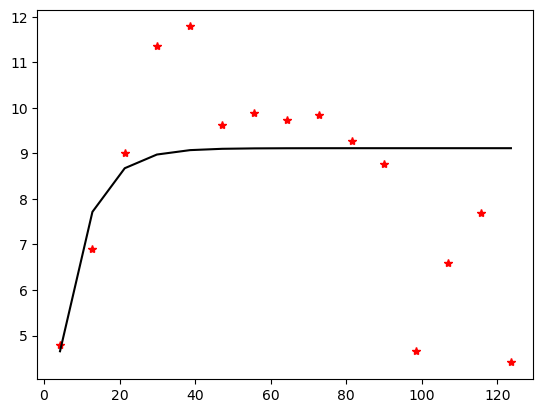

In [38]:

ok.display_variogram_model()

### Evalúe o responda las siguientes preguntas:

#### 1. El kriging puede emplear un rango variado de modelos de variograma (aussian, exponential, spherical, hole-effect models, linear and power models). Grafique varios variogramas con diferentes modelos y seleccione uno, justifique su selección.
#### 2. Realice la inferencia/predicción del Path loss por los métodos presentados para 4 porcientos de muestras perdidas (10, 45, 75 y 95).
#### 3. Realice este experimento para varias (más de 10) selecciones aleatorias de las muestras y varias secciones del tramo (3 aprox ) y guarde los distintos MAE obtenidos. Calcule el MAE medio. 
#### 4. Teniendo en cuenta los resultados, realice las siguientes concluciones. - Existe un método que siempre funciona bien bajo todas las condiciones? - Si tenemos suficiente información espacial cercana a los valores que queremos estimar cual método emplearía y porqué? - Si no tenemos información espacial en las cercanías a los puntos que queremos estimar, pero tenemos información del comportamiento de la variable en otras zonas con iguales características que método emplearía? - Si no tenemos ninguna informacíón espacial ni en las cercanias ni en ningún ambiente conocido, solo sabemos que en que tipo de escenario nos encontramos, que método emplearía?